In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [0]:
from  tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_labels.shape

(60000,)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
test_labels.shape

(10000,)

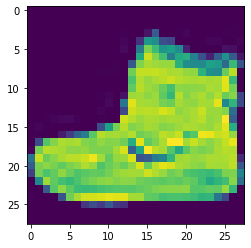

In [34]:
plt.imshow(train_images[0])
plt.show()

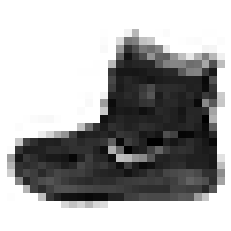

In [35]:
plt.imshow(train_images[0],'binary')
plt.axis('off')
plt.show()

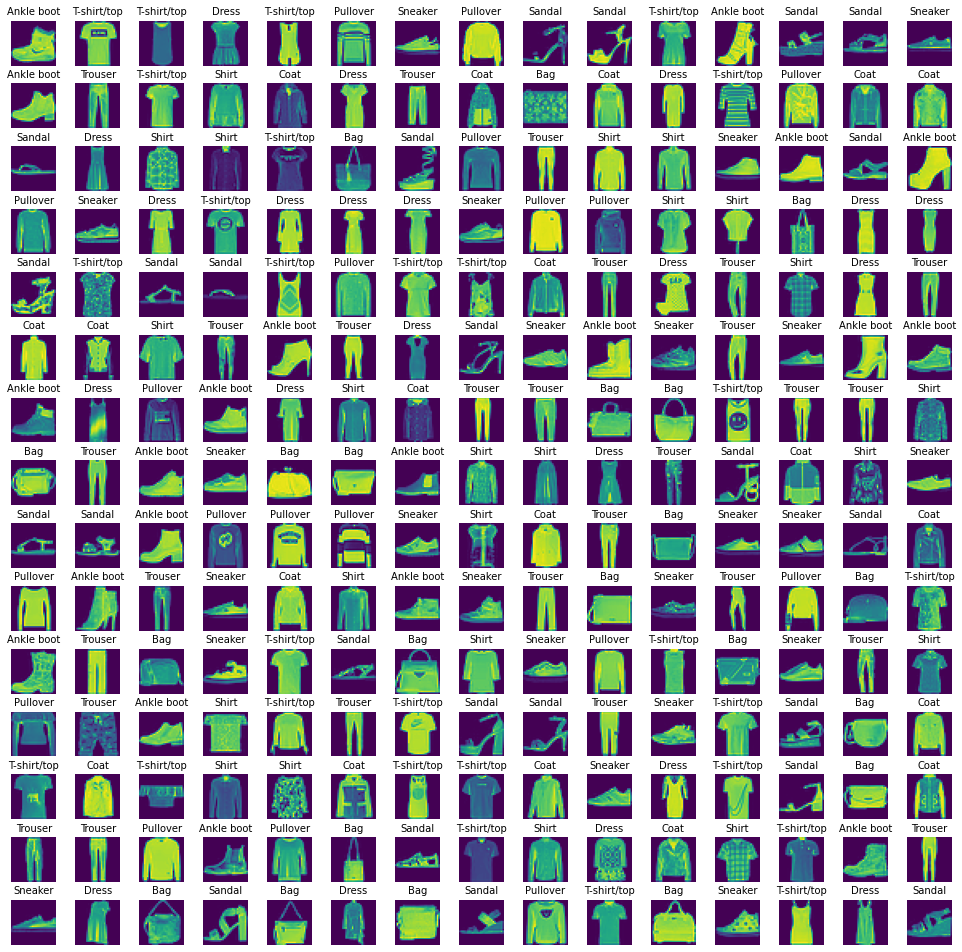

In [36]:
# lets visualize a set of images in order to have a better image of the problem
# define the demensions of the plot grid
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
w_grid = 15
l_grid = 15
fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))                                                                          
axes = axes.ravel() # flatten the 15 X 15 matrix into 255 array

for i in np.arange(0,w_grid*l_grid):
  # select the random number
  index = random.randint(0,len(train_images))
  axes[i].imshow(train_images[i],cmap='viridis')
  axes[i].set_title(class_names[train_labels[i]],fontsize=10)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.show()


In [0]:
train_images = train_images.reshape((60000,784))
test_images = test_images.reshape((10000,784))

In [38]:
train_images.shape

(60000, 784)

In [39]:
test_images.shape

(10000, 784)

In [40]:
train_images[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
test_images[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
# normalizing the training data and testing data

X_train  = train_images[:,:]/255
y_train = train_labels[:]

X_test = test_images[:,:]/255
y_test = test_labels[:]

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
# create a train and validation set
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=101)

In [0]:
# reshape dataset 
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [46]:
# check the shape
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [0]:
# import keras,layers,optimizer & callbacks
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:

# start forming the model. In our case we use an CNN & Dense model in order to solve the problem
cnn_model = Sequential()

In [49]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32,activation='relu'))
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """


In [50]:
cnn_model.fit(X_train,y_train,batch_size=512,epochs=10,verbose=1,validation_data=(X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 336us/step - loss: 0.8749 - accuracy: 0.7047 - val_loss: 0.5159 - val_accuracy: 0.8175
Epoch 2/10
48000/48000 [==============================] - 16s 340us/step - loss: 0.4580 - accuracy: 0.8390 - val_loss: 0.4386 - val_accuracy: 0.8485
Epoch 3/10
48000/48000 [==============================] - 16s 337us/step - loss: 0.4060 - accuracy: 0.8577 - val_loss: 0.3931 - val_accuracy: 0.8652
Epoch 4/10
48000/48000 [==============================] - 16s 340us/step - loss: 0.3657 - accuracy: 0.8728 - val_loss: 0.3565 - val_accuracy: 0.8741
Epoch 5/10
48000/48000 [==============================] - 16s 338us/step - loss: 0.3453 - accuracy: 0.8801 - val_loss: 0.3466 - val_accuracy: 0.8792
Epoch 6/10
48000/48000 [==============================] - 17s 344us/step - loss: 0.3306 - accuracy: 0.8845 - val_loss: 0.3317 - val_accuracy: 0.8849
Epoch 7/10
48000/48000 [==============================] 

In [51]:
evaluation = cnn_model.evaluate(X_test,y_test)
print(f'Accuracy on test dataset is {evaluation[1]}')

10000/10000 [==============================] - 2s 189us/step
Accuracy on test dataset is 0.8888000249862671


In [52]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

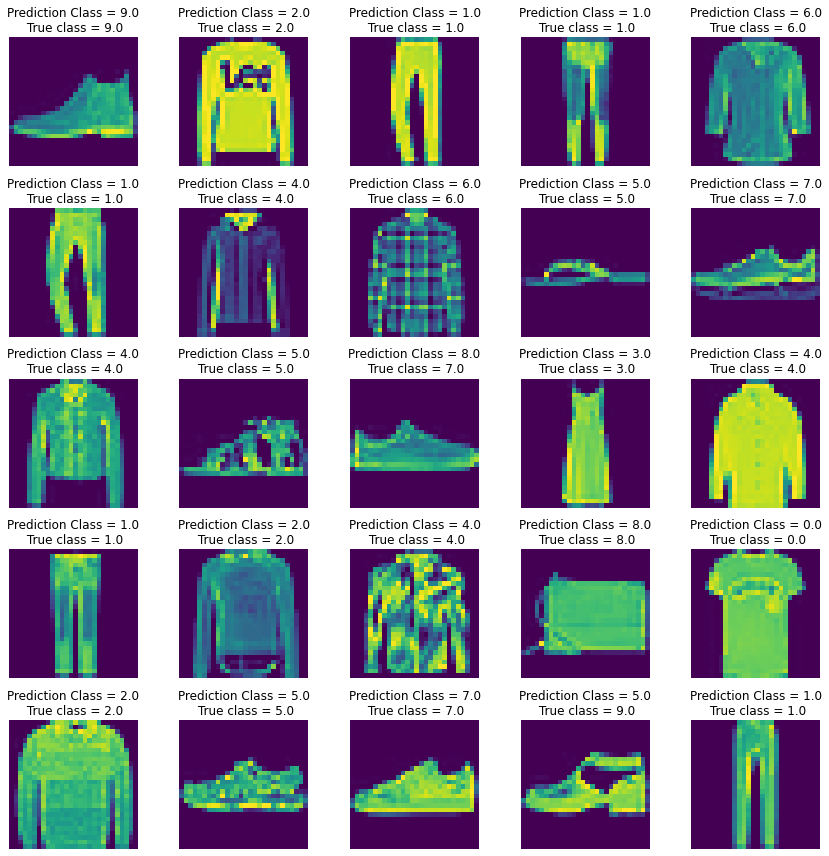

In [54]:
# plot the original class and predicted class
l = 5
w = 5
fig,axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {predicted_classes[i]:.1f}\n True class = {y_test[i]:.1f}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()